In [1]:
"""
Created on Thu Jul  4 12:00:18 2019
@author: Hieu
"""
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly
#%matplotlib inline
#import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split

In [2]:
# style.use('fivethirtyeight')
df = pd.read_csv("insurance.csv")

# print (df1.head())
# df = df1.drop(['dteday'], axis=1)
# print (df.head())

In [3]:
df.info()
df.head()
df.shape
df_A,df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train,df_val = train_test_split(df_A, test_size=0.20, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(8,2,i)
        plt.plot(df[col],df["charges"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

7


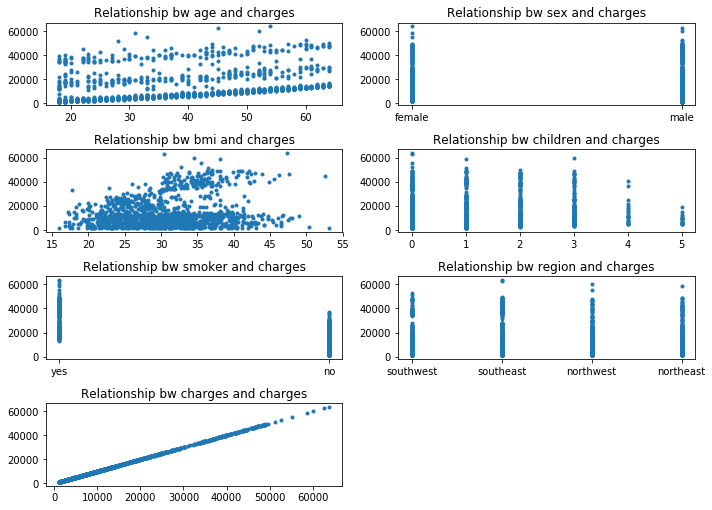

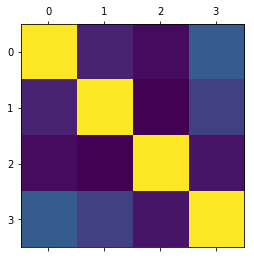

In [5]:

#colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'registered', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

colnames = df.columns

plotFeatures(colnames,"Relationship bw %s and charges")


plt.matshow(df.corr())

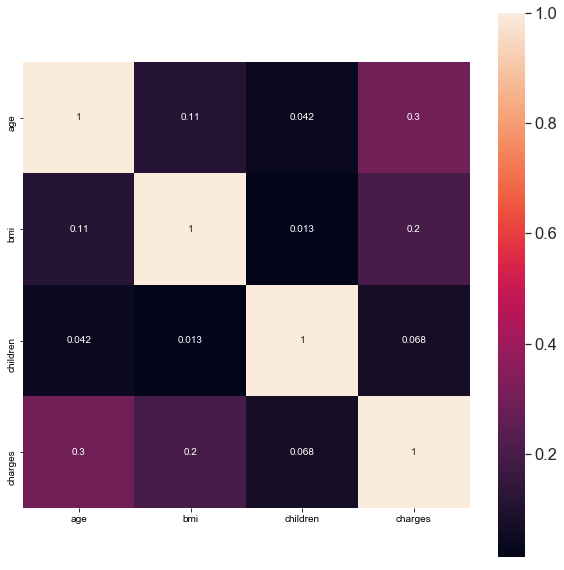

In [6]:

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()



In [7]:

def predictPrice(x,theta):
    return np.dot(x,theta)




In [8]:
def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

In [9]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
#    plt.xlim(-20, 20)
#    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x[:,-1],Y,'.',x[:,-1], y_vals, '-.') #x[:-1] second column is the weights. 
    plt.gca().legend(('Data','Regressor'))
    plt.show()

In [10]:
def loss_plot(x,costs_train,costs_val):
    '''plot the loss inforegisteredation'''
    plt.xlabel('No. of iteration')
    plt.ylabel('Loss')
    plt.plot(x,costs_train,'.',x, costs_val, '-.')
    plt.gca().legend(('Train','Val'))
    plt.show()

In [12]:
def gradientDescentLinearRegression(alpha=0.01,iter=2000,theta=[]):
    '''initialized the values'''
    prev_val = 1
    counter =0
    if any(theta):
        theta = theta
    else :
        theta = np.zeros(2)
#    else:
#        theta = np.zeros(2)
        
    theta0 = []
    theta1 = []
        
    costs_train = []
    costs_val = []
    
    '''provide the training inforegisteredation'''
    predictor = df_train["charges"]
    x_train = np.column_stack((np.ones(len(predictor)),predictor))
    Y_train = df_train["charges"]
    
   '''provide the validation inforegisteredation'''
    predictor_val = df_val["charges"]
    x_val = np.column_stack((np.ones(len(predictor_val)),predictor_val))
    Y_val = df_val["charges"]
     
    '''Do for number of iter'''
    for i in range(iter):
        '''do the prediction'''
        pred = predictPrice(x_train,theta)
        '''' correct the gradient '''
        t0 = theta[0] - alpha *(pred - Y_train).mean()
        t1 = theta[1] - alpha *((pred - Y_train)* x_train[:,1]).mean()
        theta = np.array([t0,t1])
        
        ''' training loss '''
        J_train = calculateCost(x_train,theta,Y_train)
        theta0.append(t0)
        theta1.append(t1)
        costs_train.append(J_train)
        '''validation loss'''
        J_val = calculateCost(x_val,theta,Y_val)
        costs_val.append(J_val)
        if i%10==0:
            print(f"Iteration: {i+1},Cost = {J_train},theta = {theta}")
            
            print(f"Iteration: {i+1},Cost_val = {J_val},theta = {theta}")
            
            abline(x_train,theta,Y_train)
        if J_val>prev_val:
            counter +=1   #counter = counter + 1
            prev_val = J_val
        else:
            counter = 0
            prev_val = J_val
            
        '''check the teregisteredination condition''' 
        if counter>10:
            print ("teregisteredinated")
            print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs_train)}')
            print ( J_val,prev_val,counter,i)
            return costs_val,costs_train,theta,i+1
        
#            abline(x_train,theta,Y_train)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs_train)}')
    return costs_val,costs_train,theta,iter

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

In [ ]:
costs_val,costs_train,theta,iteration=gradientDescentLinearRegression(alpha=0.000000001,iter=10000)


In [ ]:
'''prepare the test data'''
predictor_test = df_test["charges"]
x_test = np.column_stack((np.ones(len(predictor_test)),predictor_test))
Y_test = df_test["charges"]  

In [ ]:
'''Calculate the loss for test data'''
J_test = calculateCost(x_test,theta,Y_test)
print(f"Cost_test = {J_test}")

In [ ]:
'''plot the test data'''
abline(x_test,theta,Y_test)

In [ ]:
''' create range of iteration'''
iteration_range=list(range(0, iteration))

In [ ]:
'''plot loss'''
loss_plot(iteration_range,costs_train,costs_val)

In [ ]:
'''use the saved weight''' start from the last save the weight and the biased. Save the weigh & biase. 
costs_val,costs_train,theta,iteration  = gradientDescentLinearRegression(alpha=1e-5,iter=100, theta=theta)

In [ ]:
'''Calculate the loss for test data'''
J_test = calculateCost(x_test,theta,Y_test)
print(f"Cost_test = {J_test}")

In [ ]:
'''plot the test data'''
abline(x_test,theta,Y_test)

In [ ]:
''' create range of iteration'''
iteration_range=list(range(0, iteration))

In [ ]:
'''plot loss'''
loss_plot(iteration_range,costs_train,costs_val)